# Heart Disease - Exploratory Data Analysis and Visualization

Data set source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Code GitHub Link: https://github.com/Thymin3/Heart-Disease-EDA-and-Visualization
2022 file used (without "na"s)

Figure order responds to the Written Assignment 

## 1. Importing relevant Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from  matplotlib.colors import LinearSegmentedColormap

from statsmodels.graphics import mosaicplot

import geopandas as gpd

import plotly.express as px
import plotly.graph_objects as go

## 2. Loading Dataset and Initial Checks

In [3]:
df_original = pd.read_csv("2022\heart_2022_no_nans.csv")

In [4]:
df_original.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
df_original.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [6]:
df_original.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [7]:
df_original.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [8]:
df_original.shape

(246022, 40)

## 3. Data Preprocessing

### 3.1 Preparing purely numerical Dataframe 

In order to create correlation heatmaps

a) Defining data and column groups

In [9]:
# Dataframe
df_numerical = df_original.copy() # Making a copy in order not to change the original dataframe through transformations

# Column groups
all_cols = ["State", "Sex", "GeneralHealth", "PhysicalHealthDays",
       "MentalHealthDays", "LastCheckupTime", "PhysicalActivities",
       "SleepHours", "RemovedTeeth", "HadHeartAttack", "HadAngina",
       "HadStroke", "HadAsthma", "HadSkinCancer", "HadCOPD",
       "HadDepressiveDisorder", "HadKidneyDisease", "HadArthritis",
       "HadDiabetes", "DeafOrHardOfHearing", "BlindOrVisionDifficulty",
       "DifficultyConcentrating", "DifficultyWalking",
       "DifficultyDressingBathing", "DifficultyErrands", "SmokerStatus",
       "ECigaretteUsage", "ChestScan", "RaceEthnicityCategory", "AgeCategory",
       "HeightInMeters", "WeightInKilograms", "BMI", "AlcoholDrinkers",
       "HIVTesting", "FluVaxLast12", "PneumoVaxEver", "TetanusLast10Tdap",
       "HighRiskLastYear", "CovidPos"] 

# Already numerical columns
numerical_cols = df_numerical.select_dtypes(include="number").columns

# Columns with values "Yes" or "No"
yes_no_cols = ["PhysicalActivities", "HadHeartAttack", "HadAngina",
       "HadStroke", "HadAsthma", "HadSkinCancer", "HadCOPD",
       "HadDepressiveDisorder", "HadKidneyDisease", "HadArthritis",
       "DeafOrHardOfHearing", "BlindOrVisionDifficulty",
       "DifficultyConcentrating", "DifficultyWalking",
       "DifficultyDressingBathing", "DifficultyErrands",
       "ChestScan", "AlcoholDrinkers","HIVTesting", "FluVaxLast12", "PneumoVaxEver",
       "HighRiskLastYear"]

# One more column that can be easily converted to binary. "Sex" --> Will be transformed as is.

# Remaining columns
rest_cols = [x for x in all_cols if x not in yes_no_cols] # remove yes_no_cols
rest_cols = [x for x in rest_cols if x not in numerical_cols] # also remove numerical_columns 
rest_cols.remove("Sex") # remove "Sex" column

b) Transformations

In [10]:
# Numerical columns do not need to be transformed

# Changing all Yes/No answers to binary, yes = 1, no = 0
for i in yes_no_cols:
    df_numerical[f"{i}"] = df_numerical[f"{i}"].apply(lambda x: 1 if x == "Yes" else 0)

# Changing gender to binary, male = 1, female = 0
df_numerical["Sex"] = df_numerical["Sex"].apply(lambda x: 1 if x == "Male" else 0)

In [11]:
print(f"Remaining columns that still need to be transformed to numerical: {rest_cols}")

Remaining columns that still need to be transformed to numerical: ['State', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos']


In [12]:
# Tranforming remaining columns to numerical

# Replacing the GeneralHealth values with numerical values

GeneralHealth_order = ["Excellent", "Very good", "Good", "Fair", "Poor"]
GeneralHealth_vals = [5, 4, 3, 2, 1]

GeneralHealth_dict = dict(zip(GeneralHealth_order, GeneralHealth_vals))

df_numerical["GeneralHealth"].replace(GeneralHealth_dict, inplace=True)

In [13]:
# Creating new columns from every possible value

# Setting State to binary
df_numerical = pd.concat([df_numerical.drop("State", axis=1), pd.get_dummies(df_numerical.State, prefix="State_", dtype=int)], axis=1)

# Setting LastCheckupTime to binary
df_numerical = pd.concat([df_numerical.drop("LastCheckupTime", axis=1), pd.get_dummies(df_numerical.LastCheckupTime, prefix="LastCheckupTime_", dtype=int)], axis=1)

# Setting RemovedTeeth to binary
df_numerical = pd.concat([df_numerical.drop("RemovedTeeth", axis=1), pd.get_dummies(df_numerical.RemovedTeeth, prefix="RemovedTeeth_", dtype=int)], axis=1)

# Setting SmokerStatus to binary
df_numerical = pd.concat([df_numerical.drop("SmokerStatus", axis=1), pd.get_dummies(df_numerical.SmokerStatus, prefix="SmokerStatus_", dtype=int)], axis=1)

# Setting RaceEthnicityCategory to binary
df_numerical = pd.concat([df_numerical.drop("RaceEthnicityCategory", axis=1), pd.get_dummies(df_numerical.RaceEthnicityCategory, prefix="RaceEthnicityCategory_", dtype=int)], axis=1)

# Setting AgeCategory to binary
df_numerical = pd.concat([df_numerical.drop("AgeCategory", axis=1), pd.get_dummies(df_numerical.AgeCategory, prefix="AgeCategory_", dtype=int)], axis=1)

# Setting ECigaretteUsage to binary
df_numerical = pd.concat([df_numerical.drop("ECigaretteUsage", axis=1), pd.get_dummies(df_numerical.ECigaretteUsage, prefix="ECigaretteUsage_", dtype=int)], axis=1)

# Setting TetanusLast10Tdap to binary
df_numerical = pd.concat([df_numerical.drop("TetanusLast10Tdap", axis=1), pd.get_dummies(df_numerical.TetanusLast10Tdap, prefix="TetanusLast10Tdap_", dtype=int)], axis=1)

# Setting CovidPos to binary
df_numerical = pd.concat([df_numerical.drop("CovidPos", axis=1), pd.get_dummies(df_numerical.CovidPos, prefix="CovidPos_", dtype=int)], axis=1)

# Setting HadDiabetes to binary
df_numerical = pd.concat([df_numerical.drop("HadDiabetes", axis=1), pd.get_dummies(df_numerical.HadDiabetes, prefix="HadDiabetes_", dtype=int)], axis=1)

### 3.2 Other Transformations

Investigations for Age section (4.2 Age)

In [14]:
####################### Difficulties

# HEARING - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
hearing_by_age = df_original.groupby("AgeCategory")["DeafOrHardOfHearing"].value_counts().unstack()
hearing_by_age["Sum"] = hearing_by_age.sum(axis=1)

average_hearing_by_age = hearing_by_age["Yes"]/hearing_by_age["Sum"] * 100
average_hearing_overall = df_original["DeafOrHardOfHearing"].value_counts()["Yes"] / len(df_original) * 100

average_hearing_by_age = average_hearing_by_age.rename("AverageHearing")
df_hearing = average_hearing_by_age.reset_index()

# CONCENTRATION - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
concentration_by_age = df_original.groupby("AgeCategory")["DifficultyConcentrating"].value_counts().unstack()
concentration_by_age["Sum"] = concentration_by_age.sum(axis=1)

average_concentration_by_age = concentration_by_age["Yes"]/concentration_by_age["Sum"] * 100
average_concentration_overall = df_original["DifficultyConcentrating"].value_counts()["Yes"] / len(df_original) * 100

average_concentration_by_age = average_concentration_by_age.rename("AverageConcentration")
df_concentration = average_concentration_by_age.reset_index()

# WALKING - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
walking_by_age = df_original.groupby("AgeCategory")["DifficultyWalking"].value_counts().unstack()
walking_by_age["Sum"] = walking_by_age.sum(axis=1)

average_walking_by_age = walking_by_age["Yes"]/walking_by_age["Sum"] * 100
average_walking_overall = df_original["DifficultyWalking"].value_counts()["Yes"] / len(df_original) * 100

average_walking_by_age = average_walking_by_age.rename("AverageWalking")
df_walking = average_walking_by_age.reset_index()

####################### Diagnoses

# DEPRESSION - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
depression_by_age = df_original.groupby("AgeCategory")["HadDepressiveDisorder"].value_counts().unstack()
depression_by_age["Sum"] = depression_by_age.sum(axis=1)

average_depression_by_age = depression_by_age["Yes"]/depression_by_age["Sum"] * 100
average_depression_overall = df_original["HadDepressiveDisorder"].value_counts()["Yes"] / len(df_original) * 100

average_depression_by_age = average_depression_by_age.rename("AverageDepression")
df_depression = average_depression_by_age.reset_index()

# ASTHMA - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
asthma_by_age = df_original.groupby("AgeCategory")["HadAsthma"].value_counts().unstack()
asthma_by_age["Sum"] = asthma_by_age.sum(axis=1)

average_asthma_by_age = asthma_by_age["Yes"]/asthma_by_age["Sum"] * 100
average_asthma_overall = df_original["HadAsthma"].value_counts()["Yes"] / len(df_original) * 100

average_asthma_by_age = average_asthma_by_age.rename("AverageAsthma")
df_asthma = average_asthma_by_age.reset_index()

# ARTHRITIS - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
arthritis_by_age = df_original.groupby("AgeCategory")["HadArthritis"].value_counts().unstack()
arthritis_by_age["Sum"] = arthritis_by_age.sum(axis=1)

average_arthritis_by_age = arthritis_by_age["Yes"]/arthritis_by_age["Sum"] * 100
average_arthritis_overall = df_original["HadArthritis"].value_counts()["Yes"] / len(df_original) * 100

average_arthritis_by_age = average_arthritis_by_age.rename("AverageArthritis")
df_arthritis = average_arthritis_by_age.reset_index()

# SKIN CANCER - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
skin_cancer_by_age = df_original.groupby("AgeCategory")["HadSkinCancer"].value_counts().unstack()
skin_cancer_by_age["Sum"] = skin_cancer_by_age.sum(axis=1)

average_skin_cancer_by_age = skin_cancer_by_age["Yes"]/skin_cancer_by_age["Sum"] * 100
average_skin_cancer_overall = df_original["HadSkinCancer"].value_counts()["Yes"] / len(df_original) * 100

average_skin_cancer_by_age = average_skin_cancer_by_age.rename("AverageSkinCancer")
df_skin_cancer = average_skin_cancer_by_age.reset_index()

# COVID - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
covid_by_age = df_original.groupby("AgeCategory")["CovidPos"].value_counts().unstack()
covid_by_age["Sum"] = covid_by_age.sum(axis=1)

# Combined "Yes" and "Tested positive using home test without a health professional"
average_covid_by_age = (covid_by_age["Yes"] + covid_by_age["Tested positive using home test without a health professional"])/covid_by_age["Sum"] * 100
average_covid_overall = (df_original["CovidPos"].value_counts()["Yes"] +  df_original["CovidPos"].value_counts()["Tested positive using home test without a health professional"]) / len(df_original) * 100

average_covid_by_age = average_covid_by_age.rename("AverageCovid")
df_covid = average_covid_by_age.reset_index()

# COPD - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
COPD_by_age = df_original.groupby("AgeCategory")["HadCOPD"].value_counts().unstack()
COPD_by_age["Sum"] = COPD_by_age.sum(axis=1)

average_COPD_by_age = COPD_by_age["Yes"]/COPD_by_age["Sum"] * 100
average_COPD_overall = df_original["HadCOPD"].value_counts()["Yes"] / len(df_original) * 100

average_COPD_by_age = average_COPD_by_age.rename("AverageCOPD")
df_COPD = average_COPD_by_age.reset_index()

In [15]:
####################### Lifestyle

# Physical Activities - Calculating the ratio of "Yes" to all occurrences for each age category as percentages
activities_by_age = df_original.groupby("AgeCategory")["PhysicalActivities"].value_counts().unstack()
activities_by_age["Sum"] = activities_by_age.sum(axis=1)

average_activities_by_age = activities_by_age["Yes"]/activities_by_age["Sum"] * 100
average_activities_overall = df_original["PhysicalActivities"].value_counts()["Yes"] / len(df_original) * 100

average_activities_by_age = average_activities_by_age.rename("AverageActivities")
df_activities = average_activities_by_age.reset_index()

### 3.3 Functions and Variables

Functions

In [16]:
def filter_matrix(corr_matrix, treshold_lower_neg=-0.99, treshold_higher_neg=-0.3, treshold_lower_pos=0.3, treshold_higher_pos=0.99):
    """
    Filters a correlation matrix based on specified thresholds.

    Parameters:
    - corr_matrix (DataFrame): The correlation matrix to be filtered.
    - treshold_lower_neg (float): Lower threshold for negative correlation. 
    - treshold_higher_neg (float): Upper threshold for negative correlation. 
    - treshold_lower_pos (float): Lower threshold for positive correlation. 
    - treshold_higher_pos (float): Upper threshold for positive correlation. 

    Returns:
    - filtered_corr_matrix (DataFrame): The filtered correlation matrix with values outside the specified thresholds replaced with empty strings, and float values formatted to two decimal places.
                                        Floats are afterwards converted to strings as well.
    """
    filtered_corr_matrix = corr_matrix.copy()  # copy() in order to not modify the original correlation matrix
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix.columns)):
            if not ((treshold_lower_neg <= corr_matrix.iloc[i, j] <= treshold_higher_neg) or (treshold_lower_pos <= corr_matrix.iloc[i, j] <= treshold_higher_pos)):
                filtered_corr_matrix.iloc[i, j] = " "
            elif isinstance(corr_matrix.iloc[i, j], float):
                filtered_corr_matrix.iloc[i, j] = "{:.2f}".format(corr_matrix.iloc[i, j])
    return filtered_corr_matrix.astype(str)

Variables

In [17]:
# Variables

# Color maps
italy=LinearSegmentedColormap.from_list("italy", colors=["g", "w", "r"], N=256)
female_color = LinearSegmentedColormap.from_list("female", colors=["w", "#A61B4E"], N=256)
male_color = LinearSegmentedColormap.from_list("male", colors=["w", "#266B73"], N=256)

# Axes tick size
ticksize = 8

# Age category order
age_category_order = ["Age 18 to 24", "Age 25 to 29", "Age 30 to 34", "Age 35 to 39", "Age 40 to 44", "Age 45 to 49", "Age 50 to 54", "Age 55 to 59", "Age 60 to 64", "Age 65 to 69", "Age 70 to 74", "Age 75 to 79","Age 80 or older"]

In [18]:
# Subset columns for Exploratory Data Analysis 
general = ["Sex",
"GeneralHealth",
"PhysicalHealthDays",
"MentalHealthDays",
"HeightInMeters",
"WeightInKilograms",
"BMI"]

ethnicity = ["RaceEthnicityCategory__Black only, Non-Hispanic",
"RaceEthnicityCategory__Hispanic",
"RaceEthnicityCategory__Multiracial, Non-Hispanic",
"RaceEthnicityCategory__Other race only, Non-Hispanic",
"RaceEthnicityCategory__White only, Non-Hispanic",]

age = ["AgeCategory__Age 18 to 24",
"AgeCategory__Age 25 to 29",
"AgeCategory__Age 30 to 34",
"AgeCategory__Age 35 to 39",
"AgeCategory__Age 40 to 44",
"AgeCategory__Age 45 to 49",
"AgeCategory__Age 50 to 54",
"AgeCategory__Age 55 to 59",
"AgeCategory__Age 60 to 64",
"AgeCategory__Age 65 to 69",
"AgeCategory__Age 70 to 74",
"AgeCategory__Age 75 to 79",
"AgeCategory__Age 80 or older"]

teeth = [ "RemovedTeeth__1 to 5",
"RemovedTeeth__6 or more, but not all",
"RemovedTeeth__All",
"RemovedTeeth__None of them"]

heart_status = ["HighRiskLastYear"]

lifestyle = ["PhysicalActivities", 
"SleepHours",
"AlcoholDrinkers",
"SmokerStatus__Current smoker - now smokes every day",
"SmokerStatus__Current smoker - now smokes some days",
"SmokerStatus__Former smoker",
"SmokerStatus__Never smoked",
"ECigaretteUsage__Never used e-cigarettes in my entire life",
"ECigaretteUsage__Not at all (right now)",
"ECigaretteUsage__Use them every day",
"ECigaretteUsage__Use them some days"]

smoking = ["SmokerStatus__Current smoker - now smokes every day",
"SmokerStatus__Current smoker - now smokes some days",
"SmokerStatus__Former smoker",
"SmokerStatus__Never smoked",
"ECigaretteUsage__Never used e-cigarettes in my entire life",
"ECigaretteUsage__Not at all (right now)",
"ECigaretteUsage__Use them every day",
"ECigaretteUsage__Use them some days"]

medical_behaviour = ["HIVTesting",
"FluVaxLast12",
"PneumoVaxEver","LastCheckupTime__5 or more years ago",
"LastCheckupTime__Within past 2 years (1 year but less than 2 years ago)",
"LastCheckupTime__Within past 5 years (2 years but less than 5 years ago)",
"LastCheckupTime__Within past year (anytime less than 12 months ago)",
"TetanusLast10Tdap__No, did not receive any tetanus shot in the past 10 years",
"TetanusLast10Tdap__Yes, received Tdap",
"TetanusLast10Tdap__Yes, received tetanus shot but not sure what type",
"TetanusLast10Tdap__Yes, received tetanus shot, but not Tdap"]

location = ["State__Alabama",
"State__Alaska",
"State__Arizona",
"State__Arkansas",
"State__California",
"State__Colorado",
"State__Connecticut",
"State__Delaware",
"State__District of Columbia",
"State__Florida",
"State__Georgia",
"State__Guam",
"State__Hawaii",
"State__Idaho",
"State__Illinois",
"State__Indiana",
"State__Iowa",
"State__Kansas",
"State__Kentucky",
"State__Louisiana",
"State__Maine",
"State__Maryland",
"State__Massachusetts",
"State__Michigan",
"State__Minnesota",
"State__Mississippi",
"State__Missouri",
"State__Montana",
"State__Nebraska",
"State__Nevada",
"State__New Hampshire",
"State__New Jersey",
"State__New Mexico",
"State__New York",
"State__North Carolina",
"State__North Dakota",
"State__Ohio",
"State__Oklahoma",
"State__Oregon",
"State__Pennsylvania",
"State__Puerto Rico",
"State__Rhode Island",
"State__South Carolina",
"State__South Dakota",
"State__Tennessee",
"State__Texas",
"State__Utah",
"State__Vermont",
"State__Virgin Islands",
"State__Virginia",
"State__Washington",
"State__West Virginia",
"State__Wisconsin",
"State__Wyoming"]

diagnosis = ["HadHeartAttack",
"HadAngina",
"HadStroke",
"HadAsthma",
"HadSkinCancer",
"HadCOPD",
"HadDepressiveDisorder",
"HadKidneyDisease",
"HadArthritis",
"CovidPos__Yes"]

covid = ["CovidPos__No",
"CovidPos__Tested positive using home test without a health professional",
"CovidPos__Yes"]

diabetes = ["HadDiabetes__No",
"HadDiabetes__No, pre-diabetes or borderline diabetes",
"HadDiabetes__Yes",
"HadDiabetes__Yes, but only during pregnancy (female)"]

other_conditions = ["DeafOrHardOfHearing",
"BlindOrVisionDifficulty",
"DifficultyConcentrating",
"DifficultyWalking",
"DifficultyDressingBathing",
"DifficultyErrands",
"ChestScan"]

## 4. Exploration

__Available dataframes__: 
* df_numerical (purely numerical)
* df_original (original datatypes)

__Available subsets in numerical dataframe__: 
* general
* ethnicity
* age
* teeth
* heart_status
* lifestyle
* smoking
* medical_behaviour
* location
* diagnosis
* covid
* diabetes
* other_conditions

Setting Seaborn Plotting Theme:

In [19]:
# Setting plotting theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

### 4.2 Age

Age Distribution (Figure 3)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


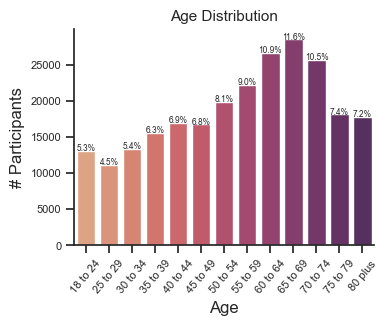

In [20]:
# Plotting
fig = sns.catplot(kind="count", data=df_original, palette="flare", x="AgeCategory", order=age_category_order, height=3, aspect=1.5)

# Calculate percentage values
total_count = len(df_original)
counts = df_original["AgeCategory"].value_counts()
percentages = [counts[age] / total_count * 100 for age in age_category_order]

# Annotate percentages on top of the bars
for i, p in enumerate(fig.ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.ax.text(x, y + 0.5, f"{percentages[i]:.1f}%", ha="center", fontsize=6)

# Setting lables
plt.title("Age Distribution", fontsize=11)
plt.xlabel("Age")
plt.ylabel("# Participants")
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
fig.set_xticklabels(labels= ["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79","80 plus"], rotation=50)

Correlation of Age and Health Conditions (Figure 1)

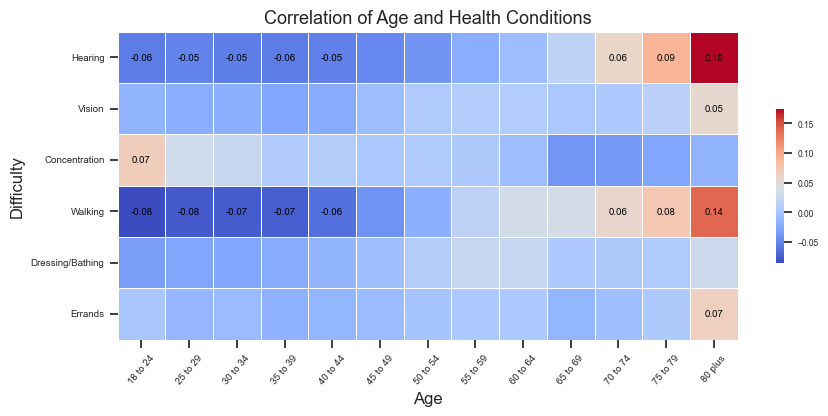

In [21]:
# Computing the correlation matrix
corr_matrix = df_numerical.loc[:, age+other_conditions].corr()

# Specifying the columns and rows by name
columns_to_display = other_conditions[0:-1] # Specify the column names
rows_to_display = age # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.05, 0.05, 0.99)

# Defining figure size
plt.figure(figsize=(10, 4))

# Creating heatmap

fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="coolwarm",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            )

# Adding lables
plt.title("Correlation of Age and Health Conditions", fontsize=13)
plt.xlabel("Age", fontsize="medium")
plt.ylabel("Difficulty", fontsize="medium")

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_yticklabels(["Hearing", "Vision", "Concentration", "Walking", "Dressing/Bathing", "Errands"]) 
fig.set_xticklabels(["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79","80 plus"], rotation=50)  

plt.show()

Difficulties among different Age Categories (Figure 4)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\marti\AppData\Local\Temp\ipykernel_18980\1451443146.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


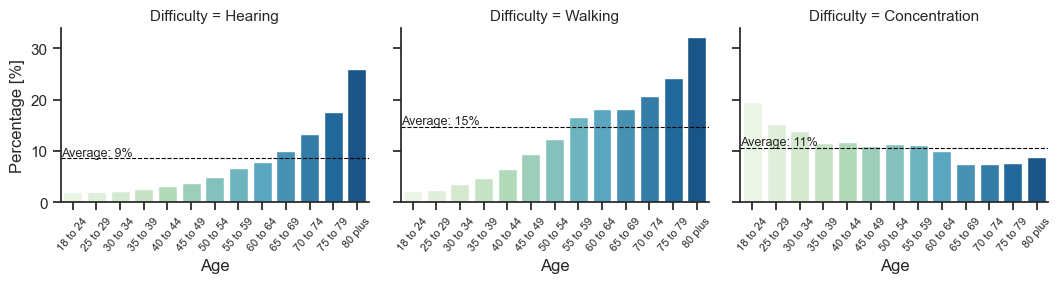

In [22]:
df_combined_1 = pd.concat([
    df_hearing.assign(Difficulty="Hearing"),
    df_walking.assign(Difficulty="Walking"),
    df_concentration.assign(Difficulty="Concentration")
])

# Plotting
g = sns.FacetGrid(df_combined_1, col="Difficulty", height=3, aspect=1.2, col_wrap=3, sharey=True, sharex=False)

g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageHearing", order=age_category_order, palette="GnBu")
g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageWalking", order=age_category_order, palette="GnBu")
g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageConcentration", order=age_category_order, palette="GnBu")

# Adding average lines and text annotations
for ax, Difficulty, average in zip(g.axes, ["Hearing", "Walking", "Concentration"],
                                   [average_hearing_overall, average_walking_overall, average_concentration_overall]):
    ax.axhline(y=average, color="black", linestyle="--", linewidth=0.8)
    ax.text(-0.5, average + 0.5, f"Average: {average:.0f}%", fontsize=9)

# Setting labels and ticks
for ax in g.axes:
    ax.set_title(ax.get_title(), fontsize=11)
    ax.set_xlabel("Age")
    ax.set_ylabel("Percentage [%]")
    ax.set_xticklabels(labels=["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54",
                                "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79", "80 plus"], rotation=50, fontsize=ticksize)

plt.tight_layout()
plt.show()

Correlation of Age and Mental Health (Figure 5)

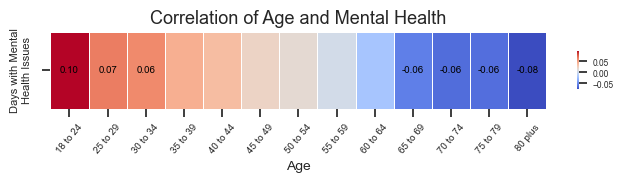

In [23]:
corr_matrix = df_numerical.loc[:, age+general].corr()

# Specifying the columns and rows by name
columns_to_display = ["MentalHealthDays"] # Specify the column names
rows_to_display = age # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.05, 0.05, 0.99)

# Defining figure size
plt.figure(figsize=(8, 1))

# Creating heatmap
fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="coolwarm",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            )

# Adding lables
plt.title("Correlation of Age and Mental Health", fontsize=13)
plt.xlabel("Age", fontsize="small")
plt.ylabel("Days with Mental\nHealth Issues", fontsize=8)

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_yticklabels([""]) 
fig.set_xticklabels(["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79","80 plus"], rotation=50)  

plt.show()

Correlation of Concentration Difficulties and Mental Health (Figure 6)

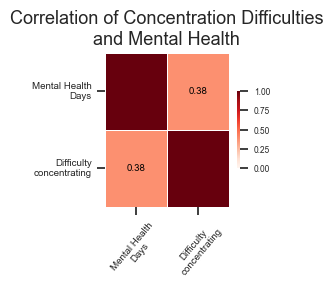

In [24]:
corr_matrix = df_numerical.loc[:, other_conditions+general].corr()

# Specifying the columns and rows by name
columns_to_display = ["MentalHealthDays", "DifficultyConcentrating"] # Specify the column names
rows_to_display = ["MentalHealthDays", "DifficultyConcentrating"] # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.05, 0.05, 0.99)

# Defining figure size
plt.figure(figsize=(2, 2))

# Creating heatmap
fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="Reds",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            vmin=0, vmax=1
            )

# Adding lables
plt.title("Correlation of Concentration Difficulties\nand Mental Health", fontsize=13)
plt.xlabel("", fontsize="small")
plt.ylabel("", fontsize="small")

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_xticklabels(["Mental Health\nDays", "Difficulty\nconcentrating"], rotation=50) 
fig.set_yticklabels(["Mental Health\nDays", "Difficulty\nconcentrating"]) 

plt.show()

Correlation of Age and Diagnoses (Figure 7)

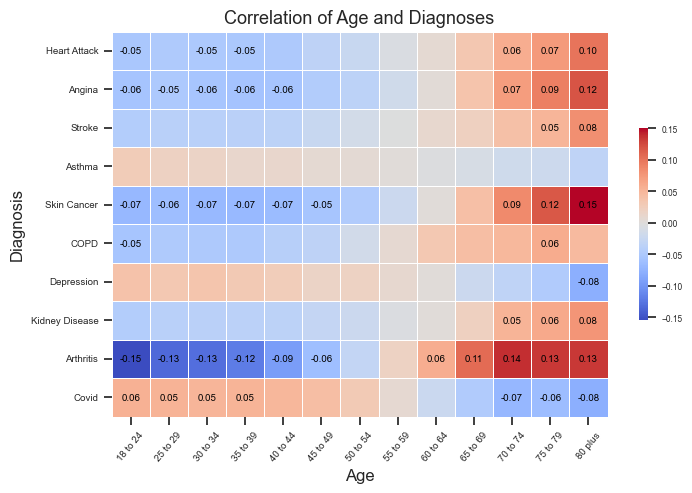

In [25]:
# Computing the correlation matrix
corr_matrix = df_numerical.loc[:, age+diagnosis].corr()

# Specifying the columns and rows by name
columns_to_display = diagnosis # Specify the column names
rows_to_display = age # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.05, 0.05, 0.99)

# Defining figure size
plt.figure(figsize=(8, 5))

# Creating heatmap
fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="coolwarm",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            )

# Adding lables
plt.title("Correlation of Age and Diagnoses", fontsize=13)
plt.xlabel("Age", fontsize="medium")
plt.ylabel("Diagnosis", fontsize="medium")

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_yticklabels(["Heart Attack", "Angina", "Stroke", "Asthma", "Skin Cancer", "COPD", "Depression", "Kidney Disease", "Arthritis", "Covid"]) 
fig.set_xticklabels(["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79","80 plus"], rotation=50)  

plt.show()

Diagnoses in Different Age Categories (Figure 8)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\m

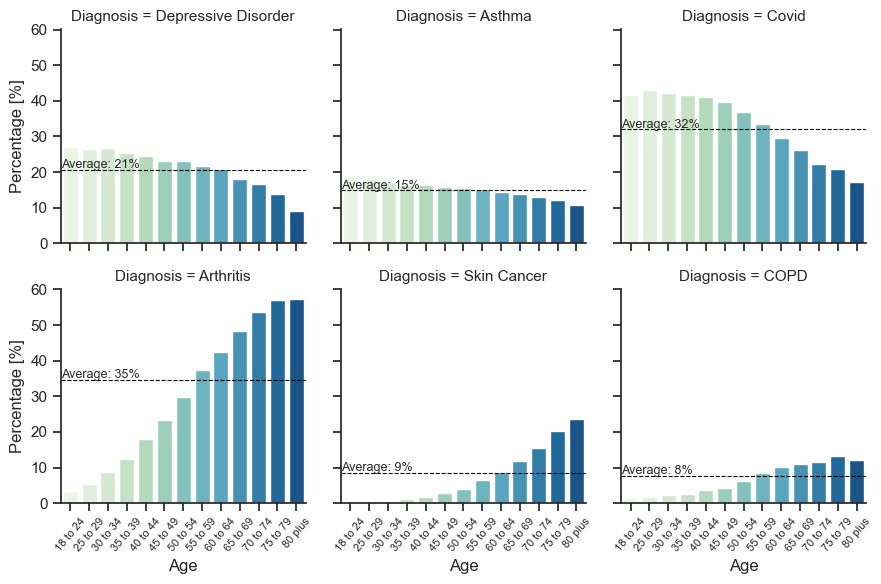

In [26]:
df_combined_2 = pd.concat([
    df_depression.assign(Diagnosis="Depressive Disorder"),
    df_asthma.assign(Diagnosis="Asthma"),
    df_covid.assign(Diagnosis="Covid"),
    df_arthritis.assign(Diagnosis="Arthritis"),
    df_skin_cancer.assign(Diagnosis="Skin Cancer"),
    df_COPD.assign(Diagnosis="COPD")
])

# Creating FacetGrid
g = sns.FacetGrid(df_combined_2, col="Diagnosis", height=3, aspect=1, col_wrap=3, sharey=True, sharex=True)

# Plotting each condition on its respective subplot
g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageDepression", order=age_category_order, palette="GnBu")
g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageAsthma", order=age_category_order, palette="GnBu")
g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageCovid", order=age_category_order, palette="GnBu")
g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageArthritis", order=age_category_order, palette="GnBu")
g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageSkinCancer", order=age_category_order, palette="GnBu")
g.map_dataframe(sns.barplot, x="AgeCategory", y="AverageCOPD", order=age_category_order, palette="GnBu")

# Adding average lines and text annotations
for ax, Condition, average in zip(g.axes, ["Depressive Disorder", "Asthma", "Covid", "Arthritis", "Skin Cancer", "COPD"],
                                   [average_depression_overall, average_asthma_overall, average_covid_overall, average_arthritis_overall,
                                    average_skin_cancer_overall, average_COPD_overall]):
    ax.axhline(y=average, color="black", linestyle="--", linewidth=0.8)
    ax.text(-0.5, average + 0.5, f"Average: {average:.0f}%", fontsize=9)

# Setting labels and ticks
for ax in g.axes:
    ax.set_title(ax.get_title(), fontsize=11)
    ax.set_xlabel("Age")
    ax.set_ylabel("Percentage [%]")
    ax.set_xticklabels(labels=["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54",
                                "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79", "80 plus"], rotation=50, fontsize=ticksize)

plt.tight_layout()
plt.show()

Correlation of Age and Lifestyle (Figure 2)

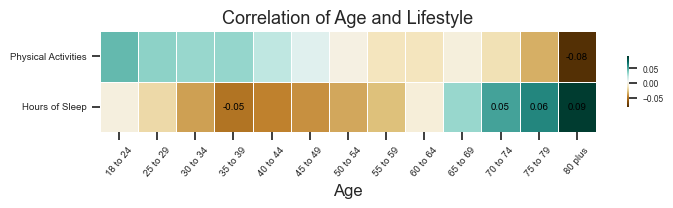

In [27]:
# Computing the correlation matrix
corr_matrix = df_numerical.loc[:, age+lifestyle].corr()

# Specifying the columns and rows by name
columns_to_display = ["PhysicalActivities", 
"SleepHours"] # Specify the column names
rows_to_display = age # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.05, 0.05, 0.99)

# Defining figure size
plt.figure(figsize=(8, 1.3))

# Creating heatmap
fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="BrBG",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            )

# Adding lables
plt.title("Correlation of Age and Lifestyle", fontsize=13)
plt.xlabel("Age")
#plt.ylabel("Diagnosis")

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_yticklabels(["Physical Activities", "Hours of Sleep"]) 
fig.set_xticklabels(["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79","80 plus"], rotation=50)  

plt.show()

Physical Activities per Age Group (Figure 9)

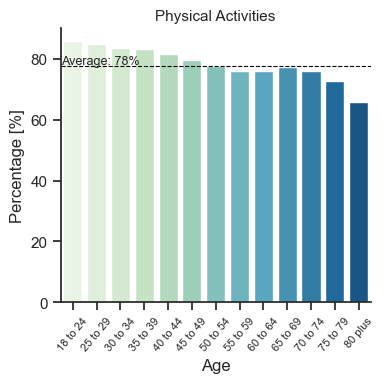

In [28]:
# Plotting
plt.figure(figsize=(4, 4))

sns.barplot(df_activities, x="AgeCategory", y="AverageActivities", order=age_category_order, palette="GnBu")


plt.title("Physical Activities", fontsize=11)
plt.xlabel("Age")
plt.ylabel("Percentage [%]")
plt.xticks(ticks=range(len(age_category_order)), labels=["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54",
                               "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79", "80 plus"], rotation=50, fontsize=ticksize)

plt.axhline(y=average_activities_overall, color="black", linestyle="--", linewidth=0.8)
plt.text(-0.5, average_activities_overall + 0.5, f"Average: {average_activities_overall:.0f}%", fontsize=9)

plt.tight_layout()
plt.show()

Hours of Sleep (Figure 10)

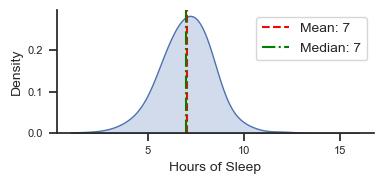

In [29]:
# Defining figure size
plt.figure(figsize=(4, 2))

# Computing mean and median
mean_sleep = df_original["SleepHours"].mean()
median_sleep = df_original["SleepHours"].median()

# Plotting
fig = sns.kdeplot(data=df_original, x="SleepHours", fill=True, bw_method=0.5, clip=(1, 16))
fig.set_ylabel("Density")

plt.axvline(mean_sleep, color="red", linestyle="--", label=f"Mean: {mean_sleep:.0f}")
plt.axvline(median_sleep, color="green", linestyle="-.", label=f"Median: {median_sleep:.0f}")

# Setting labels
plt.xlabel("Hours of Sleep", fontsize="small")
plt.ylabel("Density", fontsize="small")
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
fig.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()

Hours of Sleep per Age Category (Figure 11)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

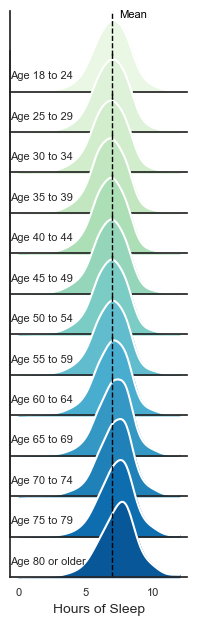

In [30]:
sns.set_theme(style="white", rc={"axes.facecolor":(0,0,0,0)})

fig = sns.FacetGrid(df_original, hue="AgeCategory", row="AgeCategory", aspect=5, height=0.5, 
                    row_order=age_category_order, hue_order=age_category_order, palette="GnBu")

# Actual kde plot
fig.map(sns.kdeplot, "SleepHours", bw_adjust=3, fill=True, alpha=1, clip_on=False, clip=(0, 12))

# White outlines
fig.map(sns.kdeplot, "SleepHours", bw_adjust=3, clip_on=False, clip=(0, 12), color="w")

# Label
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label, ha="left", va="center", transform=ax.transAxes, fontsize=8)
fig.map(label, "AgeCategory")

# Mean vline and label
for ax in fig.axes.flat:
    ax.axvline(x=mean_sleep, color="black", linestyle="--", linewidth=1)

ax_first = fig.axes[0, 0]
ax_first.text(7.5, 0.3, "Mean", color="black", fontsize=8)

# Creating ridgeplot optic
fig.figure.subplots_adjust(hspace=-0.5)
fig.set_titles("")
fig.set(yticks=[], ylabel="")
fig.set_xlabels("Hours of Sleep", fontsize=10)
fig.tick_params(axis="x", labelsize=8, length=4)

In [31]:
# Resetting seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

BMI Distribution (Figure 12)

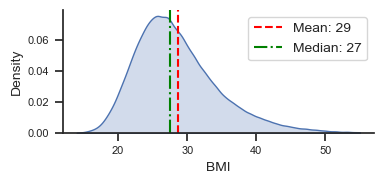

In [32]:
# Defining figure size
plt.figure(figsize=(4, 2))

# Computing mean and median
mean_bmi = df_original["BMI"].mean()
median_bmi = df_original["BMI"].median()

# Plotting
fig = sns.kdeplot(data=df_original, x="BMI", fill=True, clip=(14, 55))
fig.set_ylabel("Density")

plt.axvline(mean_bmi, color="red", linestyle="--", label=f"Mean: {mean_bmi:.0f}")
plt.axvline(median_bmi, color="green", linestyle="-.", label=f"Median: {median_bmi:.0f}")

# Setting labels
plt.xlabel("BMI", fontsize="small")
plt.ylabel("Density", fontsize="small")
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
fig.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()

BMI per Age Category (Figure 13)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

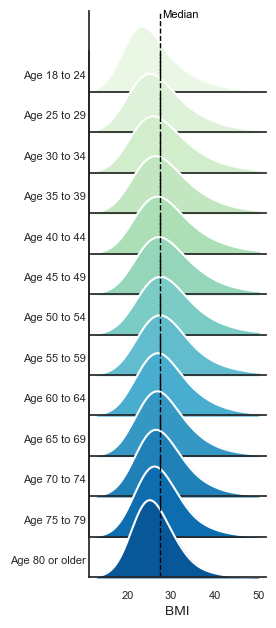

In [33]:
sns.set_theme(style="white", rc={"axes.facecolor":(0,0,0,0)})

fig = sns.FacetGrid(df_original, hue="AgeCategory", row="AgeCategory", aspect=5, height=0.5, 
                    row_order=age_category_order, hue_order=age_category_order, palette="GnBu")

# Actual kde plot
fig.map(sns.kdeplot, "BMI", bw_adjust=3, fill=True, alpha=1, clip_on=False, clip=(13, 50))

# White outlines
fig.map(sns.kdeplot, "BMI", bw_adjust=3, clip_on=False, color="w", clip=(13, 50))

# Setting label
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label + " ", ha="right", va="center", transform=ax.transAxes, fontsize=8)
fig.map(label, "AgeCategory")

for ax in fig.axes.flat:
    ax.axvline(x=median_bmi, color="black", linestyle="--", linewidth=1)

ax_first = fig.axes[0, 0]
ax_first.text(median_bmi + 0.6, 0.08, "Median", color="black", fontsize=8)

# Creating ridgeplot optic
fig.figure.subplots_adjust(hspace=-0.5)
fig.set_titles("")
fig.set(yticks=[], ylabel="")
fig.set_xlabels("BMI", fontsize=10)
fig.tick_params(axis="x", labelsize=8)

In [34]:
# Resetting seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

Box Plot Age-Gender-Weight (Figure 14)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


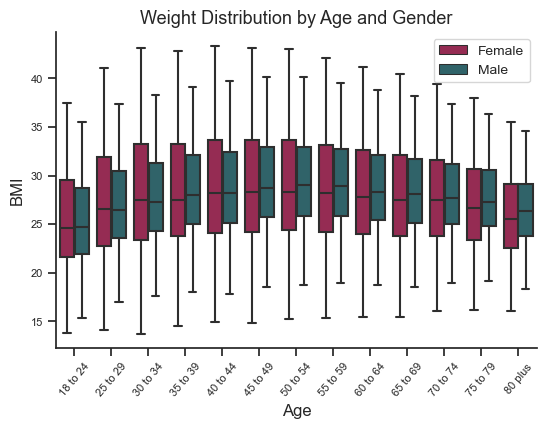

In [35]:
# Plotting
fig = sns.catplot(kind="box", data=df_original, x="AgeCategory", y="BMI", showfliers=False, whis=1, hue="Sex", palette=["#A61B4E", "#266B73"], order=age_category_order, height=4, aspect=1.5, legend=False)

# Accessing the axis object
ax = fig.ax

# Setting lables
plt.title("Weight Distribution by Age and Gender", fontsize=13)
plt.xlabel("Age", fontsize="medium")
plt.ylabel("BMI", fontsize="medium")
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
fig.set_xticklabels(labels= ["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79","80 plus"], rotation=50)

# Adjusting legend
ax.legend(fontsize="small", title_fontsize="small")

plt.show()


Line Plot Age-Gender-Weight (Figure 15)

C:\Users\marti\AppData\Local\Temp\ipykernel_18980\2663310700.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels= ["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79","80 plus"], rotation=50)


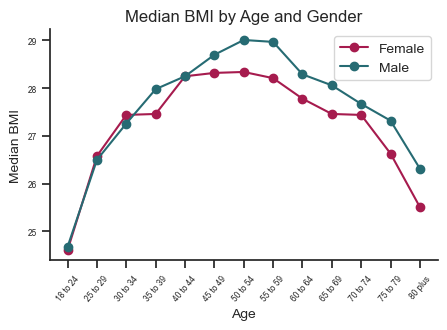

In [36]:
# Defining plot size
fig, ax = plt.subplots(figsize=(5, 3))

# Filtering dataframe for females and males
female_data = df_original[df_original["Sex"] == "Female"]
male_data = df_original[df_original["Sex"] == "Male"]

# Calculating average BMI per age category for females and males
avg_female_bmi_per_age = female_data.groupby("AgeCategory")["BMI"].median().reset_index()
avg_male_bmi_per_age = male_data.groupby("AgeCategory")["BMI"].median().reset_index()

# Plotting line plots for average BMI per age category for females and males
ax.plot(avg_female_bmi_per_age["AgeCategory"], avg_female_bmi_per_age["BMI"], color="#A61B4E", marker="o", linestyle="-", label="Female")
ax.plot(avg_male_bmi_per_age["AgeCategory"], avg_male_bmi_per_age["BMI"], color="#266B73", marker="o", linestyle="-", label="Male")

# Setting labels and title
ax.set_title("Median BMI by Age and Gender", fontsize=12)
ax.set_xlabel("Age", fontsize="small")
ax.set_ylabel("Median BMI", fontsize="small")
ax.tick_params(axis="x", labelsize=0.75*ticksize)  
ax.tick_params(axis="y", labelsize=0.75*ticksize)  
ax.set_xticklabels(labels= ["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79","80 plus"], rotation=50)
ax.legend(fontsize="small", title_fontsize="small")

plt.show()

### 4.3 Other Demographics (Gender, Height, Weight)

#### 4.3.1 Correlation Heatmap of Demographics and Diagnoses

Correlation of other Demographics and Diagnoses (Figure 16 )

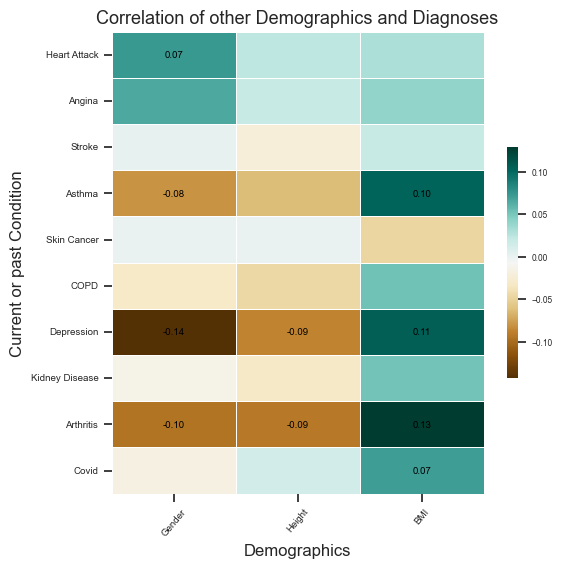

In [37]:
# Computing the correlation matrix
corr_matrix = df_numerical.loc[:, diagnosis+general].corr()

# Specifying the columns and rows by name
columns_to_display = diagnosis  # Specify the column names
rows_to_display = ["Sex", "HeightInMeters", "BMI"] # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.07, 0.07, 0.99)

# Defining figure size
plt.figure(figsize=(6, 6))

# Creating heatmap
fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="BrBG",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            )

# Adding lables
plt.title("Correlation of other Demographics and Diagnoses", fontsize=13)
plt.xlabel("Demographics")
plt.ylabel("Current or past Condition")

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_yticklabels(["Heart Attack", "Angina", "Stroke", "Asthma", "Skin Cancer", "COPD", "Depression", "Kidney Disease", "Arthritis", "Covid"]) 
fig.set_xticklabels(["Gender", "Height", "BMI"], rotation=50)  

plt.show()

#### 4.3.2 Gender

Gender Distribution (Figure 17)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


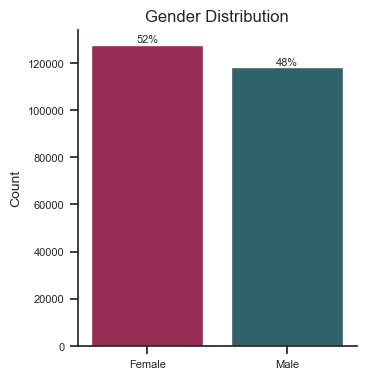

In [38]:
# Plotting
ax = sns.catplot(kind="count", data=df_original, palette=["#A61B4E", "#266B73"], x="Sex", height=4, aspect=1)

# Setting labels and title
plt.title("Gender Distribution", fontsize="medium")
plt.xlabel("")
plt.ylabel("Count", size="small")
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

# Calculating percentages and using them as annotation
total_count = len(df_original)
for p in ax.ax.patches:
    percentage = "{:.0f}%".format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.ax.text(x, y, percentage, ha="center", va="bottom", fontsize=8)

Diagnoses in Females and Males (Figure 18)

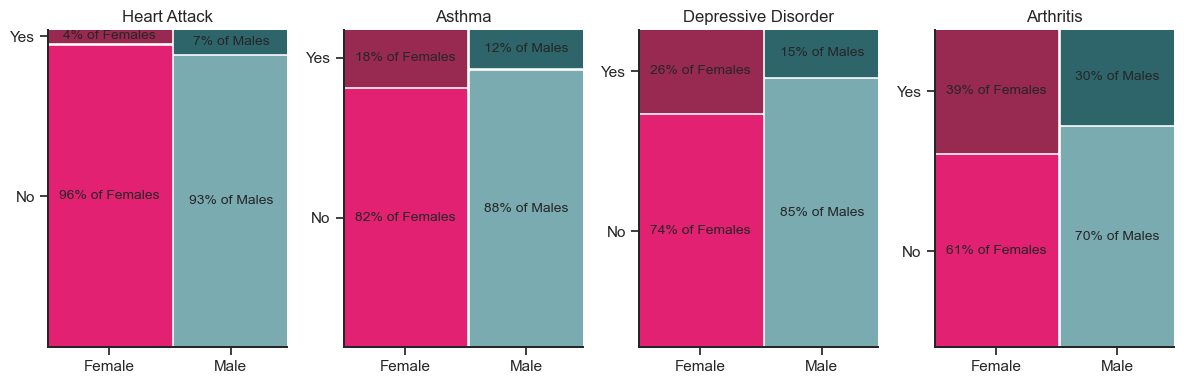

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(12,4))

# Function for labelling mosaic plot sections
def custom_labelizer(label, percentages):
    if label[0] == "Female" and label[1] == "No":
        return f"{percentages[('Female', 'No')]}% of Females" 
    elif label[0] == "Female" and label[1] == "Yes":
        return f"{percentages[('Female', 'Yes')]}% of Females" 
    elif label[0] == "Male" and label[1] == "No":
        return f"{percentages[('Male', 'No')]}% of Males"  
    elif label[0] == "Male" and label[1] == "Yes":
        return f"{percentages[('Male', 'Yes')]}% of Males" 

# Function for calculating proportions    
def calculate_proportions(df, column):
    # Calculate proportions
    proportions = {
        ("Female", "No"): len(df[(df["Sex"] == "Female") & (df[column] == "No")]) / len(df[df["Sex"] == "Female"]),
        ("Female", "Yes"): len(df[(df["Sex"] == "Female") & (df[column] == "Yes")]) / len(df[df["Sex"] == "Female"]),
        ("Male", "No"): len(df[(df["Sex"] == "Male") & (df[column] == "No")]) / len(df[df["Sex"] == "Male"]),
        ("Male", "Yes"): len(df[(df["Sex"] == "Male") & (df[column] == "Yes")]) / len(df[df["Sex"] == "Male"])
    }

    # Convert proportions to percentages and round them
    percentages = {key: round(value * 100) for key, value in proportions.items()}
    
    return percentages
    
# Defining colors
colors = {("Female", "No"): "#E22173", ("Female", "Yes"): "#982951",
          ("Male", "No"): "#7AABB1", ("Male", "Yes"): "#2E656B"}

# First Mosaic Plot (Heart Attack)
proportions_depression =  calculate_proportions(df_original, "HadHeartAttack")
fig = mosaicplot.mosaic(df_original, index=["Sex", "HadHeartAttack"], title="Heart Attack", 
                        properties=lambda key: {"color": colors[key]}, gap=0.015, labelizer=lambda label, percentages=proportions_depression: custom_labelizer(label, percentages), ax=axes[0])

# Second Mosaic Plot (Asthma)
proportions_depression =  calculate_proportions(df_original, "HadAsthma")
fig = mosaicplot.mosaic(df_original, index=["Sex", "HadAsthma"], title="Asthma", 
                        properties=lambda key: {"color": colors[key]}, gap=0.015, labelizer=lambda label, percentages=proportions_depression: custom_labelizer(label, percentages), ax=axes[1])

# Third Mosaic Plot (Depressive Disorder)
proportions_depression =  calculate_proportions(df_original, "HadDepressiveDisorder")
fig = mosaicplot.mosaic(df_original, index=["Sex", "HadDepressiveDisorder"], title="Depressive Disorder", 
                        properties=lambda key: {"color": colors[key]}, gap=0.015, labelizer=lambda label, percentages=proportions_depression: custom_labelizer(label, percentages), ax=axes[2])

# Fourth Mosaic Plot (Arthritis)
# First person in the dataframe has to be Arthritis negative in order to display "No" at the bottom of the plot. 
# Therefore dataframe is generated with people who do not have arthritis to come first in the order.
# Also ordered for women first for the same reason (display women on the left side of the plot)
arthritis_no_first = df_original.sort_values(by=["HadArthritis", "Sex"], ascending=True) 
proportions_depression =  calculate_proportions(arthritis_no_first, "HadArthritis")
fig = mosaicplot.mosaic(arthritis_no_first, index=["Sex", "HadArthritis"], title="Arthritis", 
                        properties=lambda key: {"color": colors[key]}, gap=0.015, labelizer=lambda label, percentages=proportions_depression: custom_labelizer(label, percentages), ax=axes[3])

# Adjusting layout
plt.tight_layout()

plt.show()

#### 4.3.3 Height

Gender and Height versus Arthritis and Depressive Disorder (Figure 19) 

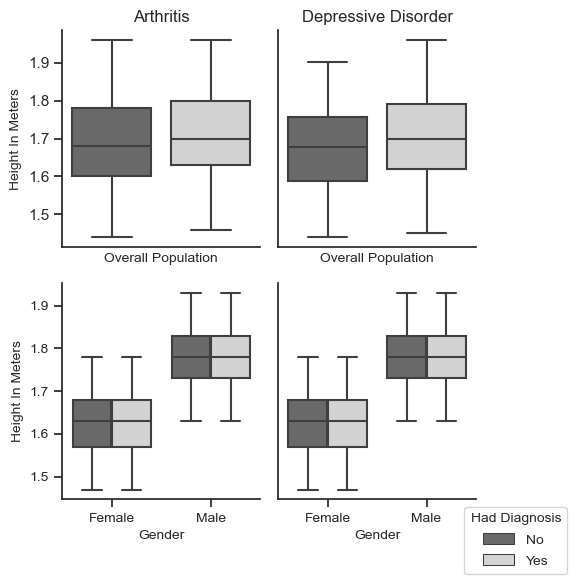

In [40]:
# Create a figure with a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
order = ["Yes", "No"]

# Create the first boxplot
sns.boxplot(data=df_original, y="HeightInMeters", x="HadArthritis", showfliers=False, whis=1, ax=axes[0, 0], palette=["dimgrey", "lightgrey"], order=order)
axes[0, 0].set_title("Arthritis")
axes[0, 0].set_xlabel("Overall Population", fontsize="small")
axes[0, 0].set_ylabel("Height In Meters", fontsize="small")
axes[0, 0].tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Create the second boxplot
sns.boxplot(data=df_original, y="HeightInMeters", x="HadDepressiveDisorder", showfliers=False, whis=1, ax=axes[0, 1], palette=["dimgrey", "lightgrey"], order=order)
axes[0, 1].set_title("Depressive Disorder")
axes[0, 1].set_xlabel("Overall Population", fontsize="small")
axes[0, 1].set_ylabel("", fontsize="small")
axes[0, 1].get_yaxis().set_visible(False)  
axes[0, 1].tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Create the third boxplot
sns.boxplot(data=df_original, y="HeightInMeters", hue="HadArthritis", x="Sex", showfliers=False, whis=1, ax=axes[1, 0], palette=["dimgrey", "lightgrey"])
axes[1, 0].set_title("")
axes[1, 0].set_ylabel("Height In Meters", fontsize="small")
axes[1, 0].set_xlabel("Gender", fontsize="small")
axes[1, 0].tick_params(axis="both", labelsize="small")

legend1 = axes[1, 0].legend()
legend1.remove()

# Create the fourth boxplot
sns.boxplot(data=df_original, y="HeightInMeters", hue="HadDepressiveDisorder", x="Sex", showfliers=False, whis=1, ax=axes[1, 1], palette=["dimgrey", "lightgrey"])
axes[1, 1].set_title("")
axes[1, 1].set_ylabel("", fontsize="small") 
axes[1, 1].set_xlabel("Gender", fontsize="small")
axes[1, 1].tick_params(axis="x", labelsize="small")
axes[1, 1].get_yaxis().set_visible(False) 

# Creating legend
legend = axes[1, 1].legend(title="Had Diagnosis", bbox_to_anchor=(1.5, 0))
plt.setp(legend.get_title(), fontsize="small") 
plt.setp(legend.get_texts(), fontsize="small")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The correlation between height and arthritis or depression appears to be influenced by gender, as men and women have different average heights. When comparing height versus gender and using arthritis or depression diagnosis as a hue, there are no discernible differences in height between individuals with and without the diagnosis within the same gender group.

Correlation of Gender, Height, and Diagnoses (Figure 20)

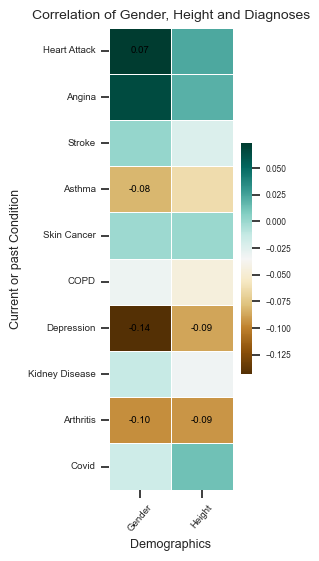

In [41]:
# Computing the correlation matrix
corr_matrix = df_numerical.loc[:, diagnosis+general].corr()

# Specifying the columns and rows by name
columns_to_display = diagnosis  # Specify the column names
rows_to_display = ["Sex", "HeightInMeters"] # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.07, 0.07, 0.99)

# Defining figure size
plt.figure(figsize=(2, 6))

# Creating heatmap
fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="BrBG",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            )

# Adding lables
plt.title("Correlation of Gender, Height and Diagnoses", fontsize=10)
plt.xlabel("Demographics", fontsize=9)
plt.ylabel("Current or past Condition", fontsize=9)

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_yticklabels(["Heart Attack", "Angina", "Stroke", "Asthma", "Skin Cancer", "COPD", "Depression", "Kidney Disease", "Arthritis", "Covid"]) 
fig.set_xticklabels(["Gender", "Height"], rotation=50)  

plt.show()

Correlation of Gender and Height (Figure 21)

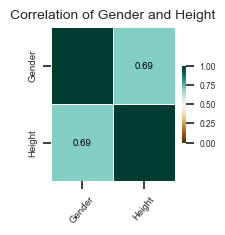

In [42]:
# Computing the correlation matrix
corr_matrix = df_numerical.loc[:, diagnosis+general].corr()

# Specifying the columns and rows by name
columns_to_display =  ["Sex", "HeightInMeters"]  # Specify the column names
rows_to_display = ["Sex", "HeightInMeters"] # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.07, 0.07, 0.99)

# Defining figure size
plt.figure(figsize=(2, 2))

# Creating heatmap
fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="BrBG",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            vmin=0, vmax=1
            )

# Adding lables
plt.title("Correlation of Gender and Height", fontsize=10)
plt.xlabel("", fontsize=9)
plt.ylabel("", fontsize=9)

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_yticklabels(["Gender", "Height"]) 
fig.set_xticklabels(["Gender", "Height"], rotation=50)  

plt.show()

#### 4.3.4 Weight

Gender and Weight versus Diagnoses (Figure 22)

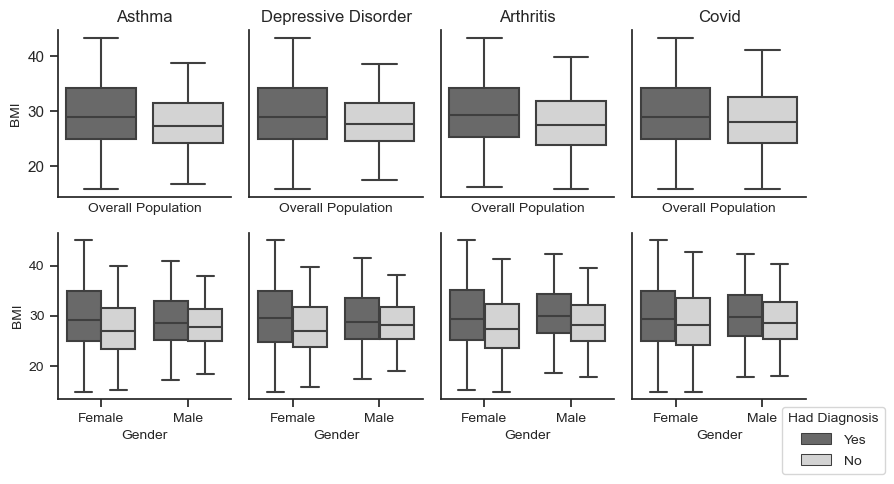

In [43]:
# Creating a figure with a 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(9, 5))

# Setting order for consitency among facets
order = ["Yes", "No"]

######################### Asthma
df_asthma_ordered = df_original.sort_values(by= ["HadAsthma", "Sex"], ascending=[False, True]) # Order so that "Yes" and "Female" comes first
# Create asthma boxplot
sns.boxplot(data=df_asthma_ordered, y="BMI", x="HadAsthma", showfliers=False, whis=1, ax=axes[0, 0], palette=["dimgrey", "lightgrey"], order=order)
axes[0, 0].set_title("Asthma")
axes[0, 0].set_xlabel("Overall Population", fontsize="small")
axes[0, 0].set_ylabel("BMI", fontsize="small")
axes[0, 0].tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Create asthma-gender boxplot
sns.boxplot(data=df_asthma_ordered, y="BMI", hue="HadAsthma", x="Sex", showfliers=False, whis=1, ax=axes[1, 0], palette=["dimgrey", "lightgrey"], hue_order= order)
axes[1, 0].set_title("")
axes[1, 0].set_ylabel("BMI", fontsize="small")
axes[1, 0].set_xlabel("Gender", fontsize="small")
axes[1, 0].tick_params(axis="both", labelsize="small")

legend1 = axes[1, 0].legend()
legend1.remove()

######################### Depression
# Create depression boxplot
sns.boxplot(data=df_original, y="BMI", x="HadDepressiveDisorder", showfliers=False, whis=1, ax=axes[0, 1], palette=["dimgrey", "lightgrey"], order=order)
axes[0, 1].set_title("Depressive Disorder")
axes[0, 1].set_xlabel("Overall Population", fontsize="small")
axes[0, 1].set_ylabel("", fontsize="small")
axes[0, 1].get_yaxis().set_visible(False)  
axes[0, 1].tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Create depression-gender boxplot
sns.boxplot(data=df_original, y="BMI", hue="HadDepressiveDisorder", x="Sex", showfliers=False, whis=1, ax=axes[1, 1], palette=["dimgrey", "lightgrey"], hue_order= order)
axes[1, 1].set_title("")
axes[1, 1].set_ylabel("", fontsize="small") 
axes[1, 1].set_xlabel("Gender", fontsize="small")
axes[1, 1].tick_params(axis="x", labelsize="small")
axes[1, 1].get_yaxis().set_visible(False) 

legend2 = axes[1, 1].legend()
legend2.remove()

######################### Arthritis
# Create arthritis boxplot
sns.boxplot(data=df_original, y="BMI", x="HadArthritis", showfliers=False, whis=1, ax=axes[0, 2], palette=["dimgrey", "lightgrey"], order=order)
axes[0, 2].set_title("Arthritis")
axes[0, 2].set_xlabel("Overall Population", fontsize="small")
axes[0, 2].get_yaxis().set_visible(False) 
axes[0, 2].tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Create arthritis-gender boxplot
sns.boxplot(data=df_original, y="BMI", hue="HadArthritis", x="Sex", showfliers=False, whis=1, ax=axes[1, 2], palette=["dimgrey", "lightgrey"], hue_order= order)
axes[1, 2].set_title("")
axes[1, 2].set_ylabel("BMI", fontsize="small")
axes[1, 2].set_xlabel("Gender", fontsize="small")
axes[1, 2].get_yaxis().set_visible(False) 
axes[1, 2].tick_params(axis="both", labelsize="small")

legend3 = axes[1, 2].legend()
legend3.remove()

######################### Covid
df_covid_filtered = df_original[df_original["CovidPos"].isin(["Yes", "No"])] # Filtering out values that differ from "Yes" or "No" (Tested pos with home test without health professional)
df_covid_filtered = df_covid_filtered.sort_values(by=["CovidPos", "Sex"], ascending=[False, True]) # Displaying "Yes" and "Female" first

# Create covid boxplot
sns.boxplot(data=df_covid_filtered, y="BMI", x="CovidPos", showfliers=False, whis=1, ax=axes[0, 3], palette=["dimgrey", "lightgrey"], order=order)
axes[0, 3].set_title("Covid")
axes[0, 3].set_xlabel("Overall Population", fontsize="small")
axes[0, 3].set_ylabel("BMI", fontsize="small")
axes[0, 3].get_yaxis().set_visible(False) 
axes[0, 3].tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Create covid-gender boxplot
sns.boxplot(data=df_covid_filtered, y="BMI", hue="CovidPos", x="Sex", showfliers=False, whis=1, ax=axes[1, 3], palette=["dimgrey", "lightgrey"], hue_order= order)
axes[1, 3].set_title("")
axes[1, 3].set_ylabel("BMI", fontsize="small")
axes[1, 3].set_xlabel("Gender", fontsize="small")
axes[1, 3].get_yaxis().set_visible(False) 
axes[1, 3].tick_params(axis="both", labelsize="small")

# Creating legend
legend = axes[1, 3].legend(title="Had Diagnosis", bbox_to_anchor=(1.5, 0))
plt.setp(legend.get_title(), fontsize="small") 
plt.setp(legend.get_texts(), fontsize="small")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 4.4 State

In [44]:
# Loading USA state shapefile
usa = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")

In [45]:
# Creating adjusted dataframe with naming conventions of "usa" dataframe
df_location = df_original.copy()
df_location["State"] = df_original["State"].replace({"Virgin Islands": "United States Virgin Islands"})

# Computing Health Status Dataframes
mental_health_per_state = df_location.groupby("State")["MentalHealthDays"].mean().reset_index()
physical_health_per_state = df_location.groupby("State")["PhysicalHealthDays"].mean().reset_index()

# Computing Demographic Dataframes
bmi_per_state = df_location.groupby("State")["BMI"].median().reset_index()

df_female = df_location[df_location["Sex"] == "Female"]
df_male = df_location[df_location["Sex"] == "Male"]

height_per_state_female = df_female.groupby("State")["HeightInMeters"].mean().reset_index()
height_per_state_male = df_male.groupby("State")["HeightInMeters"].mean().reset_index()

Median BMI among US States (Figure 24)

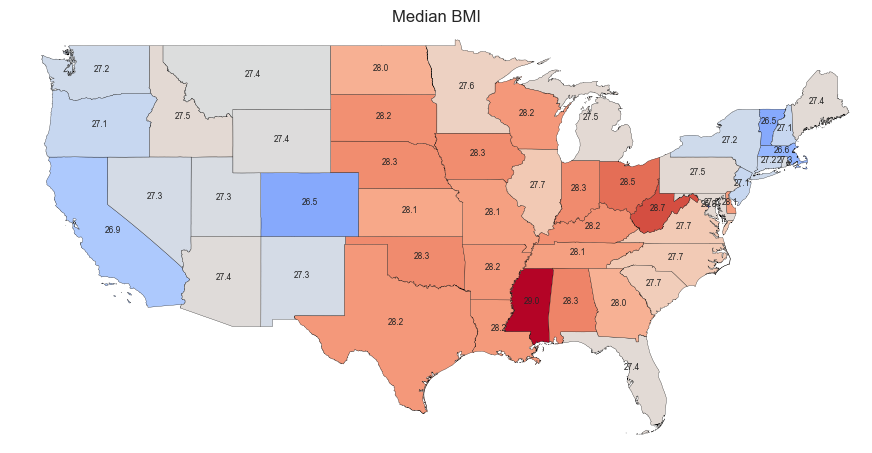

In [46]:
# Merging dataframe with usa to create a GeoDataFrame
bmi = usa.merge(bmi_per_state, left_on="NAME", right_on="State", how="left")

# Plotting 
fig = bmi.plot(column="BMI", cmap="coolwarm", legend=False, legend_kwds={"shrink": 0.1}, edgecolor="black", linewidth=0.2)

# Annotating each state with the average MentalHealthDays
for idx, row in bmi.iterrows():
    annotation_text = "{:.1f}".format(row["BMI"])
    plt.annotate(text=annotation_text, xy=row["geometry"].centroid.coords[0], horizontalalignment="center", fontsize=6)

# Figure Size
plt.gcf().set_size_inches(11, 16)

# Setting figure limits
plt.xlim(-127, -66)  
plt.ylim(24, 50)

# Hiding x and y axes
plt.axis("off")

# Setting labels
plt.title("Median BMI")

plt.show()

Interactive Plotly Plot - Median BMI (Figure 23)

In [ ]:
# Creating a GeoDataFrame using Plotly express
fig = px.choropleth(bmi, 
                    geojson=bmi.geometry, 
                    locations=bmi.index, 
                    color="BMI",
                    color_continuous_scale="balance",
                    range_color=(bmi["BMI"].min(), bmi["BMI"].max()),
                    labels={"BMI": "Median BMI"},
                    hover_name="NAME",
                    hover_data={"BMI": True},
                    projection="mercator"
                   )

# Updating layout
fig.update_geos(fitbounds="locations", visible=False)

# Set figure size
fig.update_layout(width=1000, height=800)

# Set title
fig.update_layout(title_text="Median BMI")

fig.show()

Distribution of Mental and Physical Health Days (Figure 25)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\marti\AppData\Local\Temp\ipykernel_18980\1922070422.py:31: UserWarning:

The figure layout has changed to tight



<Figure size 800x400 with 0 Axes>

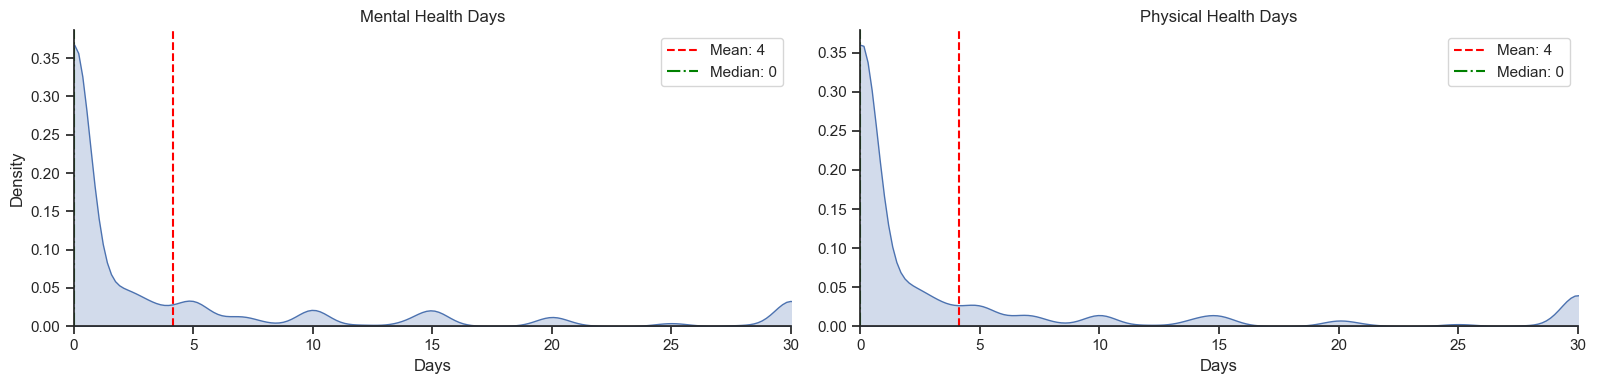

In [48]:
# Creating a DataFrame with both mental and physical health data
df_health = pd.concat([df_original["MentalHealthDays"], df_original["PhysicalHealthDays"]], axis=1)
df_health.columns = ["Mental Health Days", "Physical Health Days"]

# Figure size
plt.figure(figsize=(8, 4))

# Creating a FacetGrid
g = sns.FacetGrid(df_health.melt(), col="variable", sharex=False, sharey=False, height=4, aspect=2)

# Mapping KDE plots onto the FacetGrid
g.map_dataframe(sns.kdeplot, x="value", fill=True)

# Adding mean and median lines to each plot
for ax, col in zip(g.axes.flat, df_health.columns):
    mean_val = df_health[col].mean()
    median_val = df_health[col].median()
    ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.0f}")
    ax.axvline(median_val, color="green", linestyle="-.", label=f"Median: {median_val:.0f}")
    ax.legend(handles=[plt.Line2D([0], [0], color="red", linestyle="--", label=f"Mean: {mean_val:.0f}"),
                       plt.Line2D([0], [0], color="green", linestyle="-.", label=f"Median: {median_val:.0f}")])
    ax.set(xlim=(0, 30))

g.set_titles(col_template="{col_name}", row_template="{row_name}", fontsize=14)

# Setting labels and legend
g.set_axis_labels("Days", "Density")
g.add_legend()

# Adjusting layout
plt.tight_layout()

plt.show()

Average Days with Mental or Physical Health Problems (Figure 26)

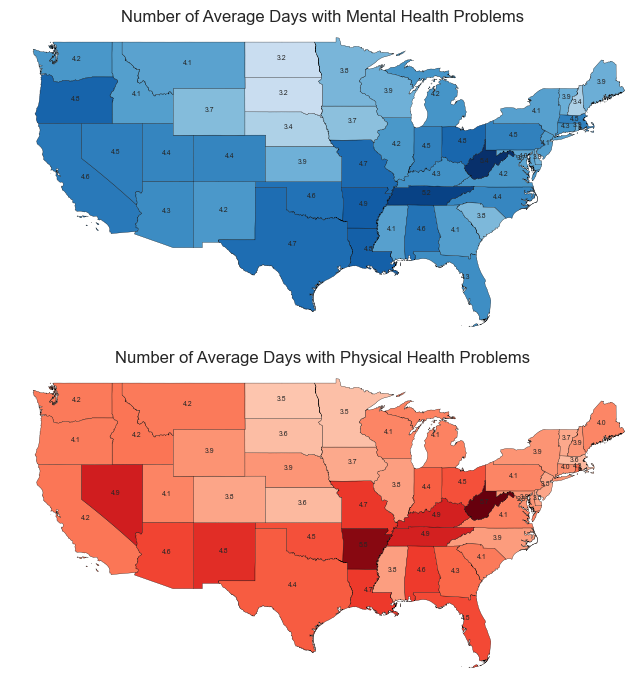

In [49]:
fig, axes = plt.subplots(2,1, figsize=(7,7))

# Merging dataframe with usa to create a GeoDataFrame
mental_health = usa.merge(mental_health_per_state, left_on="NAME", right_on="State", how="left")
physical_health = usa.merge(physical_health_per_state, left_on="NAME", right_on="State", how="left")


# Plotting Mental Health
mental_fig = mental_health.plot(column="MentalHealthDays", cmap="Blues", legend=False, legend_kwds={"shrink": 0.07}, edgecolor="black", linewidth=0.2, ax=axes[0])
axes[0].set_xlim(-127, -66)  
axes[0].set_ylim(24, 50)
axes[0].set_title("Number of Average Days with Mental Health Problems")

# Plotting Physical Health
physical_fig = physical_health.plot(column="PhysicalHealthDays", cmap="Reds", legend=False, legend_kwds={"shrink": 0.07}, edgecolor="black", linewidth=0.2, ax=axes[1])
axes[1].set_xlim(-127, -66)  
axes[1].set_ylim(24, 50)
axes[1].set_title("Number of Average Days with Physical Health Problems")

# Annotating each state with the average MentalHealthDays
for idx, row in mental_health.iterrows():
    annotation_text = "{:.1f}".format(row["MentalHealthDays"])
    mental_fig.axes.annotate(text=annotation_text, xy=row["geometry"].centroid.coords[0], horizontalalignment="center", fontsize=5)


# Annotating each state with the average PhysicalHealthDays
for idx, row in physical_health.iterrows():
    annotation_text = "{:.1f}".format(row["PhysicalHealthDays"])
    physical_fig.axes.annotate(text=annotation_text, xy=row["geometry"].centroid.coords[0], horizontalalignment="center", fontsize=5)


# Hiding x and y axes
mental_fig.axis("off")
physical_fig.axis("off")

# Adjusting layout
plt.tight_layout()

plt.show()



Correlation of Mental and Physical Health Days (Figure 27)

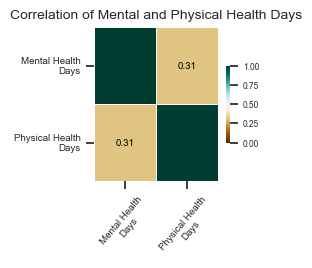

In [50]:
# Computing the correlation matrix
corr_matrix = df_numerical.loc[:, diagnosis+general].corr()

# Specifying the columns and rows by name
columns_to_display =  ["MentalHealthDays", "PhysicalHealthDays"]  # Specify the column names
rows_to_display = ["MentalHealthDays", "PhysicalHealthDays"] # Specify the row names
corr_matrix_subset = corr_matrix.loc[columns_to_display, rows_to_display]

# Setting values outside the specified range to an empty string and limit floats to two digits after the comma
filtered_corr_matrix = filter_matrix(corr_matrix_subset, -0.99, -0.07, 0.07, 0.99)

# Defining figure size
plt.figure(figsize=(2, 2))

# Creating heatmap
fig = sns.heatmap(corr_matrix_subset, 
            fmt="s",
            annot=filtered_corr_matrix, # Show filtered correlation values
            cmap="BrBG",       
            linewidths=0.5,    
            cbar_kws={"shrink": 0.5}, # Adjust color bar size
            annot_kws={"size": 7, "color": "black"},
            vmin=0, vmax=1
            )

# Adding lables
plt.title("Correlation of Mental and Physical Health Days", fontsize=10)
plt.xlabel("", fontsize=9)
plt.ylabel("", fontsize=9)

# Custom tick size
fig.tick_params(axis="both", which="both", labelsize=7)

# Adjusting color bar label size
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Custom tick names
fig.set_yticklabels(["Mental Health\nDays", "Physical Health\nDays"]) 
fig.set_xticklabels(["Mental Health\nDays", "Physical Health\nDays"], rotation=50)  

plt.show()

Interactive Plotly Plots - Average Days with Mental/Physical Health - Not displayed in Written Assigment

In [ ]:
# Creating GeoDataFrame using Plotly express
mental_health_fig = px.choropleth(mental_health, 
                                   geojson=mental_health.geometry, 
                                   locations=mental_health.index, 
                                   color="MentalHealthDays",
                                   color_continuous_scale="Blues",
                                   range_color=(mental_health["MentalHealthDays"].min(), mental_health["MentalHealthDays"].max()),
                                   hover_name="NAME",
                                   hover_data={"MentalHealthDays": True},
                                   projection="mercator",
                                   title="Number of Average Days with Mental Health Problems"
                                  )

# Updating layout
mental_health_fig.update_geos(fitbounds="locations", visible=False)

# Setting figure size
mental_health_fig.update_layout(width=800, height=600)

# Creating GeoDataFrame using Plotly express for physical health
physical_health_fig = px.choropleth(physical_health, 
                                    geojson=physical_health.geometry, 
                                    locations=physical_health.index, 
                                    color="PhysicalHealthDays",
                                    color_continuous_scale="Reds",
                                    range_color=(physical_health["PhysicalHealthDays"].min(), physical_health["PhysicalHealthDays"].max()),
                                    hover_name="NAME",
                                    hover_data={"PhysicalHealthDays": True},
                                    projection="mercator",
                                    title="Number of Average Days with Physical Health Problems"
                                   )

# Updating layout
physical_health_fig.update_geos(fitbounds="locations", visible=False)

# Figure size
physical_health_fig.update_layout(width=800, height=600)

mental_health_fig.show()
physical_health_fig.show()


Height in Meters - Female/Male - Not displayed in Written Assigment

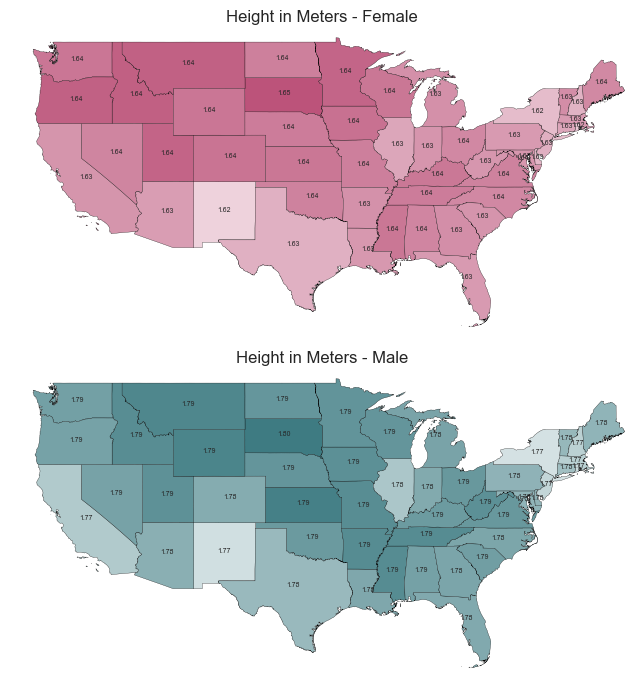

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7))

# Range for legend values (states not displayed have deviating values that lead to optic that is too uniform in the static plot)
legend_min_female = 1.61
legend_max_female = 1.66
legend_min_male = 1.76
legend_max_male = 1.8

# Merging dataframe with usa to create GeoDataFrames
height_female = usa.merge(height_per_state_female, left_on="NAME", right_on="State", how="left")
height_male = usa.merge(height_per_state_male, left_on="NAME", right_on="State", how="left")

# Plotting Female Height
height_female_plot = height_female.plot(column="HeightInMeters", cmap=female_color, legend=False, 
                                         legend_kwds={"shrink": 0.1}, edgecolor="black", linewidth=0.2, 
                                         vmin=legend_min_female, vmax=legend_max_female, ax=axes[0])

axes[0].set_xlim(-127, -66)  
axes[0].set_ylim(24, 50)
axes[0].set_title("Height in Meters - Female")
axes[0].axis("off")

# Annotating each state with the average height (female)
for idx, row in height_female.iterrows():
    annotation_text = "{:.2f}".format(row["HeightInMeters"])
    height_female_plot.annotate(text=annotation_text, xy=row["geometry"].centroid.coords[0], 
                                horizontalalignment="center", fontsize=5)


# Plotting Male Height
height_male_plot = height_male.plot(column="HeightInMeters", cmap=male_color, legend=False, 
                                     legend_kwds={"shrink": 0.1}, edgecolor="black", linewidth=0.2, 
                                     vmin=legend_min_male, vmax=legend_max_male, ax=axes[1])

axes[1].set_xlim(-127, -66)  
axes[1].set_ylim(24, 50)
axes[1].set_title("Height in Meters - Male")
axes[1].axis("off")

# Annotating each state with the average height (male)
for idx, row in height_male.iterrows():
    annotation_text = "{:.2f}".format(row["HeightInMeters"])
    height_male_plot.annotate(text=annotation_text, xy=row["geometry"].centroid.coords[0], 
                              horizontalalignment="center", fontsize=5)


plt.tight_layout()
plt.show()

Interactive Plotly Plot - Height in Meters - Female/Male - Not displayed in Written Assigment

In [ ]:
# Plotting Female Height
fig_female = px.choropleth(height_female, 
                           geojson=height_female.geometry, 
                           locations=height_female.index, 
                           color="HeightInMeters",
                           color_continuous_scale="Reds",
                           hover_name="NAME",
                           hover_data={"HeightInMeters": True},
                           projection="mercator",
                           title="Height in Meters - Female"
                          )


# Updating layout
fig_female.update_geos(fitbounds="locations", visible=False)

# Settingfigure size
fig_female.update_layout(width=800, height=600)


# Plotting Male Height
fig_male = px.choropleth(height_male, 
                         geojson=height_male.geometry, 
                         locations=height_male.index, 
                         color="HeightInMeters",
                         color_continuous_scale="Blues",
                         hover_name="NAME",
                         hover_data={"HeightInMeters": True},
                         projection="mercator",
                         title="Height in Meters - Male"
                        )

# Updating layout
fig_male.update_geos(fitbounds="locations", visible=False)

# Figure size
fig_male.update_layout(width=800, height=600)

fig_female.show()
fig_male.show()